# PA 2: Classification - Nearest Neighbors

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load titanic.scv dataset from sklearn datasets. [1 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. Explain what other ways can we use to find the best value of K. [3 points]
* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations in 4 - 5 lines. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix
import seaborn as sb

In [2]:
# 1) Loading the titanic dataset
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data description and missing values analysis
print("Summary of titanic data numerical variables:\n", titanic_data.describe())
print("\nMissing values by all the columns\n", titanic_data.isna().sum())

# Impute the missing values in Age & emabraked variables
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True) # Impute Age using mean (or) average
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode().iloc[0], inplace = True) # Impute Emabraked using mode

# convert the categorical variables into numerical categories to help in calculating distances in NN method
titanic_data['Sex'] = titanic_data.Sex.replace({'male':0,'female':1})
titanic_data['Embarked'] = titanic_data.Embarked.replace({'S':0,'C':1, 'Q':2})

Summary of titanic data numerical variables:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Missing values by all the columns
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


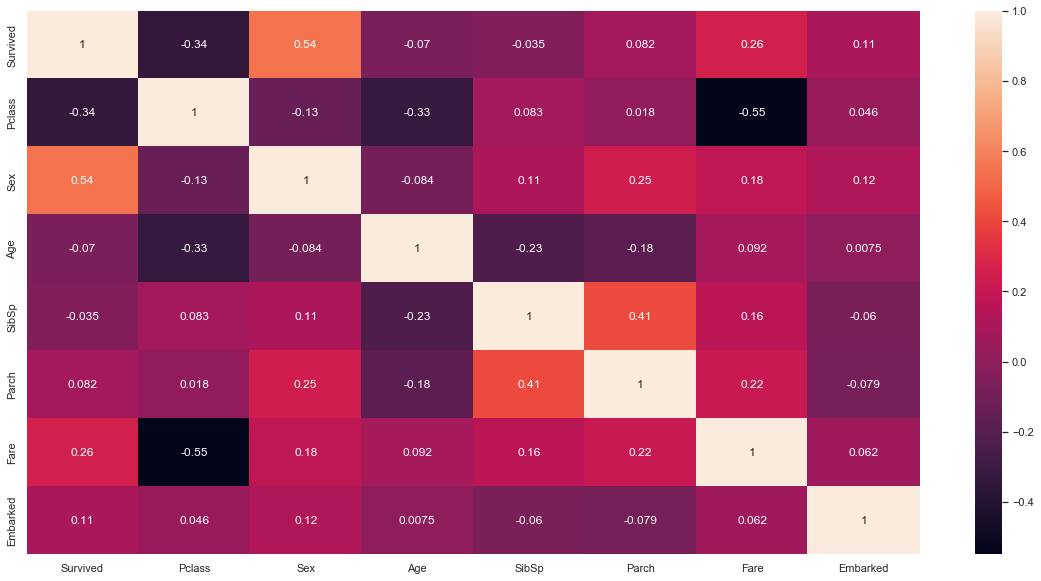

In [4]:
# 2) Selecting best 3 attributes for training and testing your model

# plotting correlation matrix to see which variables are related each other
sb.set(rc={'figure.figsize':(20,10)})
correlations_matrix = titanic_data.corr()
ax = sb.heatmap(correlations_matrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# selecting 3 independent variables as attributes based on the above correlation plot and explainability
# and 1 class / dependent variable: Survived
titanic_model_data = titanic_data[['Sex', 'Pclass', 'Embarked','Survived']]
titanic_X_data = titanic_model_data[['Pclass', 'Sex', 'Embarked']]
titanic_y_data = titanic_model_data['Survived']

In [5]:
#Splitting the dataset into 75% for training, and 25% for testing the classifier.

X_train, X_test, y_train, y_test = train_test_split(titanic_X_data, titanic_y_data,train_size=0.75,test_size=0.25,random_state=0)

The error rate of the NN classification model when k=3 is: 0.2152
Below is the confusion matrix when k=3


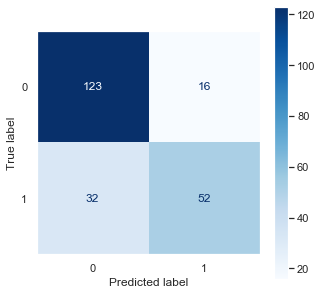

Below is the classification report with precision, recall & f1 scores when k=3
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       139
           1       0.76      0.62      0.68        84

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223



In [6]:
# building model with k=3 neighbors and using euclidean distance as a metric of measure as stated in the requirements
nn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean') # build a NN classifier for k = 3 & distance metric as euclidean 
nn_model.fit(X_train,y_train) # train the NN model with training data
predictions=nn_model.predict(X_test) # use the trained NN model to predict the outcomes of testing data
error_pct = round(np.mean(predictions!=y_test),4) # calculating error rate using the predicted values & actual values of the test dataset

# Evaluating performance of the model using accuracy, confusion matrix & 
# classification report explaining various performance indicators of confusion matrix
print("The error rate of the NN classification model when k=3 is:",error_pct)
print("Below is the confusion matrix when k=3")
fig, lines = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(nn_model, X_test, y_test, ax=lines, cmap="Blues") # plotting confusion matrix heatmap
plt.grid(False)
plt.show()
print("Below is the classification report with precision, recall & f1 scores when k=3")
print(classification_report(y_test, predictions)) # printing classification report


##### Now repeating the model training process for K = 6 & 9 as per the requirements

The error rate of the NN classification model when k=6 is: 0.1883
Below is the confusion matrix when k=6


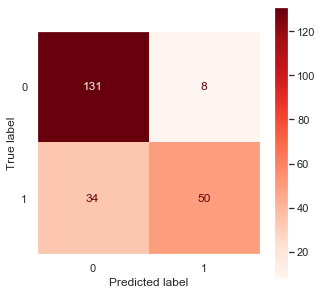

Below is the classification report with precision, recall & f1 scores when k=6
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       139
           1       0.86      0.60      0.70        84

    accuracy                           0.81       223
   macro avg       0.83      0.77      0.78       223
weighted avg       0.82      0.81      0.80       223



In [7]:
# building model with k=6 neighbors and using euclidean distance as a metric of measure as stated in the requirements
nn_model=KNeighborsClassifier(n_neighbors=6,metric='euclidean') # build a NN classifier for k = 6 & distance metric as euclidean 
nn_model.fit(X_train,y_train) # train the NN model with training data
predictions=nn_model.predict(X_test) # use the trained NN model to predict the outcomes of testing data
error_pct = round(np.mean(predictions!=y_test),4) # calculating error rate using the predicted values & actual values of the test dataset

# Evaluating performance of the model using accuracy, confusion matrix & 
# classification report explaining various performance indicators of confusion matrix
print("The error rate of the NN classification model when k=6 is:",error_pct) # plotting confusion matrix heatmap
print("Below is the confusion matrix when k=6")
fig, lines = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(nn_model, X_test, y_test,ax=lines, cmap="Reds") # plotting confusion matrix heatmap
plt.grid(False)
plt.show()
print("Below is the classification report with precision, recall & f1 scores when k=6")
print(classification_report(y_test, predictions)) # printing classification report


The error rate of the NN classification model when k=9 is: 0.1883
Below is the confusion matrix when k=9


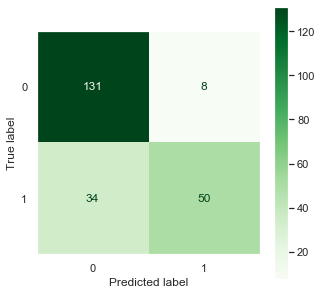

Below is the classification report with precision, recall & f1 scores when k=9
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       139
           1       0.86      0.60      0.70        84

    accuracy                           0.81       223
   macro avg       0.83      0.77      0.78       223
weighted avg       0.82      0.81      0.80       223



In [8]:
# building model with k=9 neighbors and using euclidean distance as a metric of measure as stated in the requirements
nn_model=KNeighborsClassifier(n_neighbors=9,metric='euclidean') # build a NN classifier for k = 6 & distance metric as euclidean 
nn_model.fit(X_train,y_train) # train the NN model with training data
predictions=nn_model.predict(X_test) # use the trained NN model to predict the outcomes of testing data
error_pct = round(np.mean(predictions!=y_test),4) # calculating error rate using the predicted values & actual values of the test dataset

# Evaluating performance of the model using accuracy, confusion matrix & 
# classification report explaining various performance indicators of confusion matrix
print("The error rate of the NN classification model when k=9 is:",error_pct)
print("Below is the confusion matrix when k=9")
fig, lines = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(nn_model, X_test, y_test, ax=lines, cmap="Greens") # plotting confusion matrix heatmap
plt.grid(False)
plt.show()
print("Below is the classification report with precision, recall & f1 scores when k=9")
print(classification_report(y_test, predictions)) # printing classification report


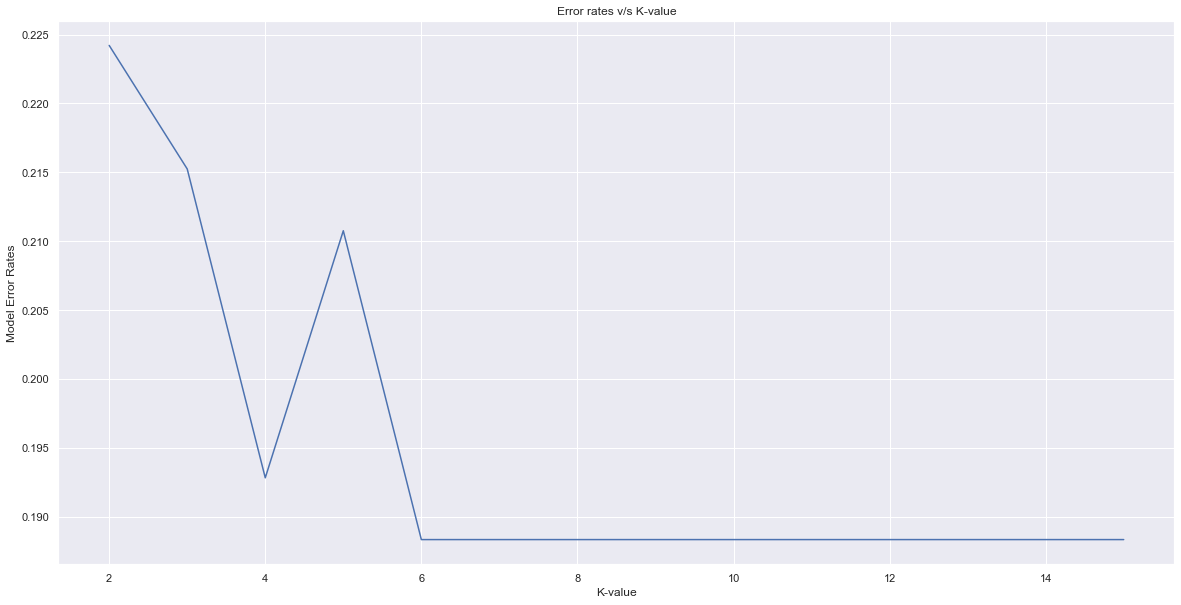

In [9]:
# Training and evaluating the NN model for k = 2 to 16
error_rates=[]
for k in range(2,16):
    # starting a model k-nearest neigbors and eulidean distance as a metric for calculating distance
    nn_model = KNeighborsClassifier(n_neighbors=k,metric='euclidean') 
    # training the model using train dataset
    nn_model.fit(X_train,y_train)
    # predicting the outcomes for testing data using the trained model
    predictions=nn_model.predict(X_test)
    # appending the error rates into a list for all various K-values
    error_rates.append(np.mean(predictions!=y_test))


# plotting the elbow graph showing the accuracy of various NN models with different K values
plt.plot(range(2,16),error_rates)
plt.xlabel('K-value')
plt.ylabel('Model Error Rates')
plt.title('Error rates v/s K-value')
plt.show()

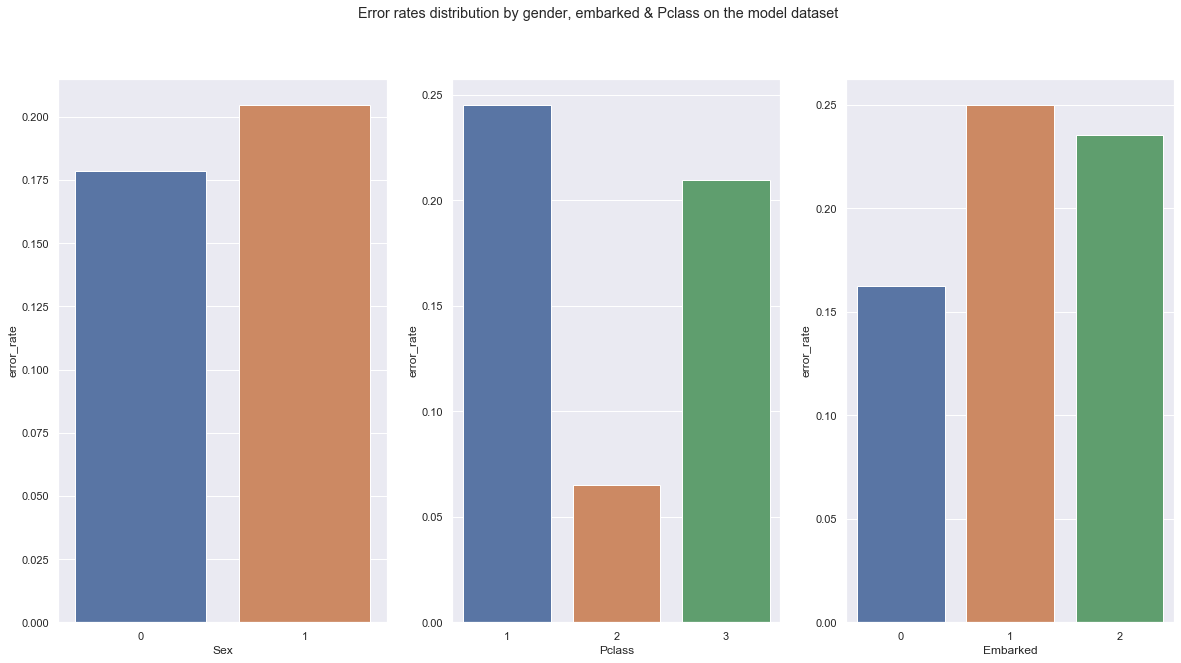

In [10]:
#creating a dataframe with the test dataset, predicted model output & error in classification variable
titanic_test_model_data = X_test.copy()
titanic_test_model_data["Survived_Actual"] = y_test.copy()
titanic_test_model_data["Survived_Model"] = predictions.copy()
titanic_test_model_data.reset_index(inplace=True)
titanic_test_model_data.drop('index', axis=1, inplace=True)
titanic_test_model_data["Error_In_Classification"] = np.where(titanic_test_model_data.Survived_Actual == titanic_test_model_data.Survived_Model,0,1)


# plotting the classifier data with the error rates in classifications for the 3 attributes selected for males
titanic_test_model_gender_data = titanic_test_model_data.groupby(['Sex']).agg(error_rate=("Error_In_Classification", 'mean'))
titanic_test_model_gender_data = titanic_test_model_gender_data.reset_index()

titanic_test_model_pclass_data = titanic_test_model_data.groupby(['Pclass']).agg(error_rate=("Error_In_Classification", 'mean'))
titanic_test_model_pclass_data = titanic_test_model_pclass_data.reset_index()

titanic_test_model_embarked_data = titanic_test_model_data.groupby(['Embarked']).agg(error_rate=("Error_In_Classification", 'mean'))
titanic_test_model_embarked_data = titanic_test_model_embarked_data.reset_index()

# plotting the two error rate graphs for the 3 attributes
fig, axes = plt.subplots(1, 3)
sb.barplot(x="Sex",y="error_rate",data=titanic_test_model_gender_data,ax=axes[0])
sb.barplot(x="Pclass",y="error_rate",data=titanic_test_model_pclass_data,ax=axes[1])
sb.barplot(x="Embarked",y="error_rate",data=titanic_test_model_embarked_data,ax=axes[2])
plt.suptitle("Error rates distribution by gender, embarked & Pclass on the model dataset")
plt.show()

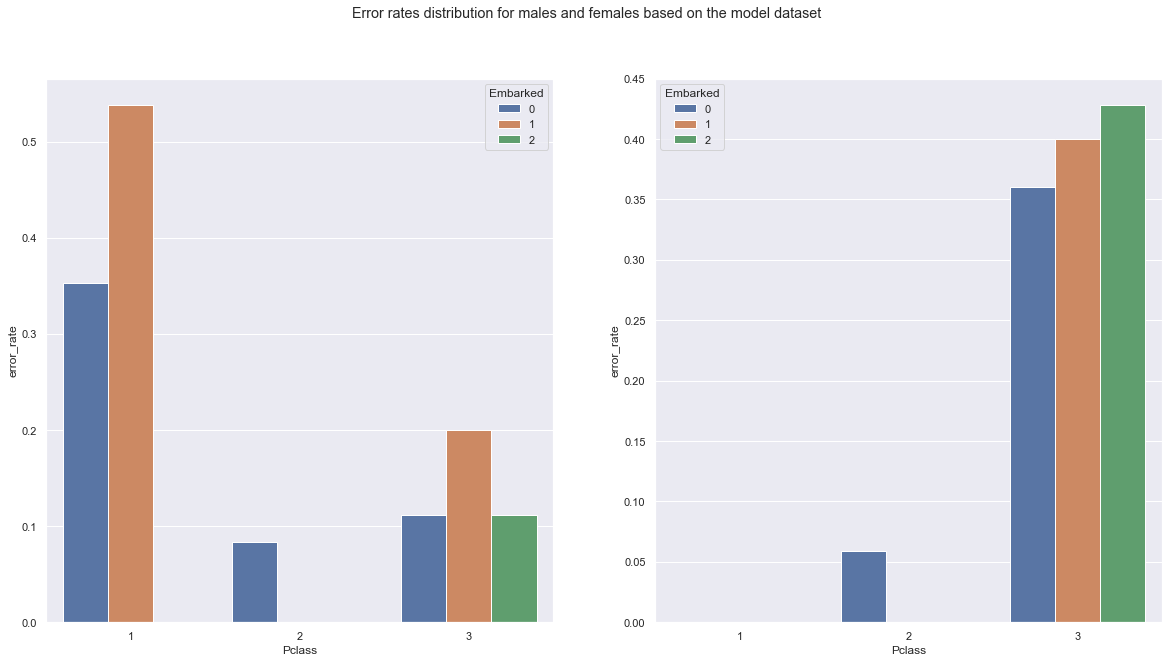

In [11]:
# Q5) creating a dataframe with the test dataset, predicted model output & error in classification variable
titanic_test_model_data = X_test.copy()
titanic_test_model_data["Survived_Actual"] = y_test.copy()
titanic_test_model_data["Survived_Model"] = predictions.copy()
titanic_test_model_data.reset_index(inplace=True)
titanic_test_model_data.drop('index', axis=1, inplace=True)
titanic_test_model_data["Error_In_Classification"] = np.where(titanic_test_model_data.Survived_Actual == titanic_test_model_data.Survived_Model,0,1)

# splitting test model data set into males and females datasets
titanic_test_model_male_data =  titanic_test_model_data[titanic_test_model_data.Sex == 0]
titanic_test_model_female_data =  titanic_test_model_data[titanic_test_model_data.Sex == 1]

# plotting the classifier data with the error rates in classifications for the 3 attributes selected for males
titanic_test_model_male_data = titanic_test_model_male_data.groupby(['Pclass', 'Embarked']).agg(error_rate=("Error_In_Classification", 'mean'))
titanic_test_model_male_data = titanic_test_model_male_data.reset_index()

# plotting the classifier data with the error rates in classifications for the 3 attributes selected for females
titanic_test_model_female_data = titanic_test_model_female_data.groupby(['Pclass', 'Embarked']).agg(error_rate=("Error_In_Classification", 'mean'))
titanic_test_model_female_data = titanic_test_model_female_data.reset_index()

# plotting the two error rate graphs for the 3 attributes
fig, axes = plt.subplots(1, 2)
sb.barplot(x="Pclass",y="error_rate",hue="Embarked",data=titanic_test_model_male_data,ax=axes[0])
sb.barplot(x="Pclass",y="error_rate",hue="Embarked",data=titanic_test_model_female_data,ax=axes[1])
plt.suptitle("Error rates distribution for males and females based on the model dataset")
plt.show()